## 버전 확인 및 환경 설정

In [1]:
!pwd
!dir

/content
drive  sample_data


In [2]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          69G   39G   30G  57% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.8G     0  5.8G   0% /dev/shm
/dev/sda1        75G   40G   35G  54% /opt/bin
tmpfs           6.4G   24K  6.4G   1% /var/colab
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G   10G  5.1G  67% /content/drive


In [3]:
!cat /proc/meminfo

MemTotal:       13333552 kB
MemFree:        10579272 kB
MemAvailable:   12461460 kB
Buffers:           85088 kB
Cached:          1940972 kB
SwapCached:            0 kB
Active:           995276 kB
Inactive:        1445936 kB
Active(anon):     383420 kB
Inactive(anon):      368 kB
Active(file):     611856 kB
Inactive(file):  1445568 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               684 kB
Writeback:             0 kB
AnonPages:        415156 kB
Mapped:           244256 kB
Shmem:              1012 kB
Slab:             176396 kB
SReclaimable:     131284 kB
SUnreclaim:        45112 kB
KernelStack:        4784 kB
PageTables:         5980 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6666776 kB
Committed_AS:    3246976 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:             1032 kB
AnonHugePages:   

In [2]:
!nvidia-smi

Sun Mar  7 12:15:29 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [6]:
!gcc --version

gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [3]:
import torch
torch.__version__

'1.5.1+cu101'

In [4]:
!python -V

Python 3.7.10


In [9]:
!pip install -U torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 704.4MB 26kB/s 
     |████████████████████████████████| 6.7MB 58.8MB/s 
  Found existing installation: torch 1.7.1+cu101
    Uninstalling torch-1.7.1+cu101:
      Successfully uninstalled torch-1.7.1+cu101
  Found existing installation: torchvision 0.8.2+cu101
    Uninstalling torchvision-0.8.2+cu101:
      Successfully uninstalled torchvision-0.8.2+cu101


In [5]:
!pip install mmcv-full

     |████████████████████████████████| 235kB 8.1MB/s 
     |████████████████████████████████| 194kB 13.7MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.2.7-cp37-cp37m-linux_x86_64.whl size=20239694 sha256=78d04e0f458acc3b31e907299357da39e877455860f8e49d7a388908af145858
  Stored in directory: /root/.cache/pip/wheels/d9/eb/f8/766019b8f36d3a7b655618fc46d65bf52801906b30185a4624
Successfully built mmcv-full


In [12]:
!rm -rf mmdetection

In [229]:
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

fatal: destination path 'mmdetection' already exists and is not an empty directory.
/content/mmdetection
Obtaining file:///content/mmdetection
  Running setup.py develop for mmdet


In [14]:
!pip install Pillow==7.0.0

In [15]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.5.1+cu101 True
2.10.0
11.0
GCC 7.5


In [16]:
!mkdir checkpoints

## 기존 학습 모델 활용 및 테스트

In [17]:
!wget -c http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth \
      -O checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth

--2021-03-07 12:28:41--  http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.88.36.78
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.36.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177867103 (170M) [application/octet-stream]
Saving to: ‘checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth’

checkpoints/mask_rc 100%[===================>] 169.63M  10.6MB/s    in 17s     

2021-03-07 12:28:59 (10.2 MB/s) - ‘checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth’ saved [177867103/177867103]



In [18]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# Choose to use a config and initialize the detector
config = 'configs/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco.py'
# Setup a checkpoint file to load
checkpoint = 'checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'
# initialize the detector
model = init_detector(config, checkpoint, device='cuda:0')

Use load_from_local loader


In [19]:
# Use the detector to do inference
img = 'demo/demo.jpg'
result = inference_detector(model, img)

/content/mmdetection/mmdet/datasets/utils.py:68: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


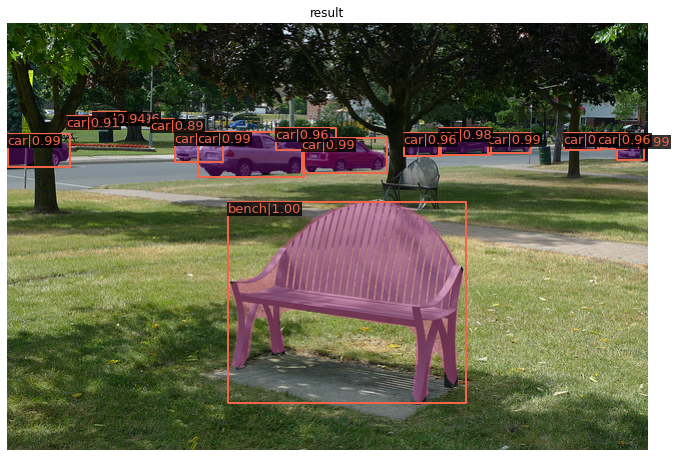

In [21]:
# Let's plot the result
show_result_pyplot(model, img, result, score_thr=0.7)

In [22]:
# download, decompress the data
!wget https://download.openmmlab.com/mmdetection/data/kitti_tiny.zip
!unzip kitti_tiny.zip > /dev/null

--2021-03-07 12:29:58--  https://download.openmmlab.com/mmdetection/data/kitti_tiny.zip
Resolving download.openmmlab.com (download.openmmlab.com)... 47.88.36.78
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.36.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6918271 (6.6M) [application/zip]
Saving to: ‘kitti_tiny.zip’

kitti_tiny.zip      100%[===================>]   6.60M  9.63MB/s    in 0.7s    

2021-03-07 12:29:59 (9.63 MB/s) - ‘kitti_tiny.zip’ saved [6918271/6918271]



In [23]:
# Check the directory structure of the tiny data

# Install tree first
!apt-get -q install tree
!tree kitti_tiny

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 1s (74.3 kB/s)
Selecting previously unselected package tree.
(Reading database ... 160975 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
kitti_tiny
├── training
│   ├── image_2
│   │   ├── 000000.jpeg
│   │   ├── 000001.jpeg
│   │   ├── 000002.jpeg
│   │   ├── 000003.jpeg
│   │   ├── 000004.jpeg
│   │   ├── 000005.jpeg
│   │   ├── 000006.jpeg
│   │   ├── 000007.jpeg
│   │   ├── 000008.jpeg
│   │   ├── 000009.jpeg
│   │   ├── 0

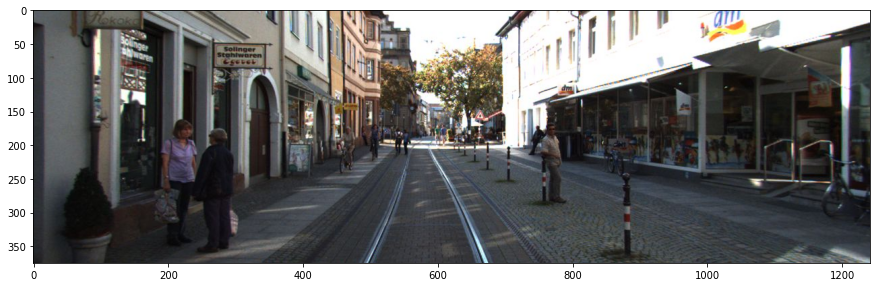

In [24]:
# Let's take a look at the dataset image
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('kitti_tiny/training/image_2/000073.jpeg')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [25]:
# Check the label of a single image
!cat kitti_tiny/training/label_2/000000.txt

Pedestrian 0.00 0 -0.20 712.40 143.00 810.73 307.92 1.89 0.48 1.20 1.84 1.47 8.41 0.01


In [26]:
import copy
import os.path as osp

import mmcv
import numpy as np

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset

@DATASETS.register_module()
class KittiTinyDataset(CustomDataset):

    CLASSES = ('Car', 'Pedestrian', 'Cyclist')

    def load_annotations(self, ann_file):
        cat2label = {k: i for i, k in enumerate(self.CLASSES)}
        # load image list from file
        image_list = mmcv.list_from_file(self.ann_file)
    
        data_infos = []
        # convert annotations to middle format
        for image_id in image_list:
            filename = f'{self.img_prefix}/{image_id}.jpeg'
            image = mmcv.imread(filename)
            height, width = image.shape[:2]
    
            data_info = dict(filename=f'{image_id}.jpeg', width=width, height=height)
    
            # load annotations
            label_prefix = self.img_prefix.replace('image_2', 'label_2')
            lines = mmcv.list_from_file(osp.join(label_prefix, f'{image_id}.txt'))
    
            content = [line.strip().split(' ') for line in lines]
            bbox_names = [x[0] for x in content]
            bboxes = [[float(info) for info in x[4:8]] for x in content]
    
            gt_bboxes = []
            gt_labels = []
            gt_bboxes_ignore = []
            gt_labels_ignore = []
    
            # filter 'DontCare'
            for bbox_name, bbox in zip(bbox_names, bboxes):
                if bbox_name in cat2label:
                    gt_labels.append(cat2label[bbox_name])
                    gt_bboxes.append(bbox)
                else:
                    gt_labels_ignore.append(-1)
                    gt_bboxes_ignore.append(bbox)

            data_anno = dict(
                bboxes=np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
                labels=np.array(gt_labels, dtype=np.long),
                bboxes_ignore=np.array(gt_bboxes_ignore,
                                       dtype=np.float32).reshape(-1, 4),
                labels_ignore=np.array(gt_labels_ignore, dtype=np.long))

            data_info.update(ann=data_anno)
            data_infos.append(data_info)

        return data_infos

In [27]:
from mmcv import Config
cfg = Config.fromfile('./configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_1x_coco.py')

In [28]:
from mmdet.apis import set_random_seed

# Modify dataset type and path
cfg.dataset_type = 'KittiTinyDataset'
cfg.data_root = 'kitti_tiny/'

cfg.data.test.type = 'KittiTinyDataset'
cfg.data.test.data_root = 'kitti_tiny/'
cfg.data.test.ann_file = 'train.txt'
cfg.data.test.img_prefix = 'training/image_2'

cfg.data.train.type = 'KittiTinyDataset'
cfg.data.train.data_root = 'kitti_tiny/'
cfg.data.train.ann_file = 'train.txt'
cfg.data.train.img_prefix = 'training/image_2'

cfg.data.val.type = 'KittiTinyDataset'
cfg.data.val.data_root = 'kitti_tiny/'
cfg.data.val.ann_file = 'val.txt'
cfg.data.val.img_prefix = 'training/image_2'

# modify num classes of the model in box head
cfg.model.roi_head.bbox_head.num_classes = 3
# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = 'checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './tutorial_exps'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# Change the evaluation metric since we use customized dataset.
cfg.evaluation.metric = 'mAP'
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 12
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 12

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)


# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='FasterRCNN',
    pretrained='open-mmlab://detectron2/resnet50_caffe',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=False),
        norm_eval=True,
        style='caffe'),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.0),
        los

In [29]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector


# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(
    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

/content/mmdetection/mmdet/datasets/custom.py:155: UserWarning: CustomDataset does not support filtering empty gt images.
  'CustomDataset does not support filtering empty gt images.')
2021-03-07 12:31:00,618 - mmdet - INFO - load model from: open-mmlab://detectron2/resnet50_caffe
2021-03-07 12:31:00,619 - mmdet - INFO - Use load_from_openmmlab loader
Downloading: "https://download.openmmlab.com/pretrain/third_party/resnet50_msra-5891d200.pth" to /root/.cache/torch/checkpoints/resnet50_msra-5891d200.pth


2021-03-07 12:31:12,871 - mmdet - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: conv1.bias



2021-03-07 12:31:13,177 - mmdet - INFO - load checkpoint from checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
2021-03-07 12:31:13,178 - mmdet - INFO - Use load_from_local loader
2021-03-07 12:31:13,319 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([4, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([4]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([12, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 25/25, 11.8 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-03-07 12:33:20,096 - mmdet - INFO - 
+------------+-----+------+--------+-------+
| class      | gts | dets | recall | ap    |
+------------+-----+------+--------+-------+
| Car        | 62  | 134  | 0.952  | 0.867 |
| Pedestrian | 13  | 59   | 0.846  | 0.744 |
| Cyclist    | 7   | 64   | 0.429  | 0.034 |
+------------+-----+------+--------+-------+
| mAP        |     |      |        | 0.548 |
+------------+-----+------+--------+-------+
2021-03-07 12:33:20,099 - mmdet - INFO - Epoch(val) [12][25]	AP50: 0.5480, mAP: 0.5483


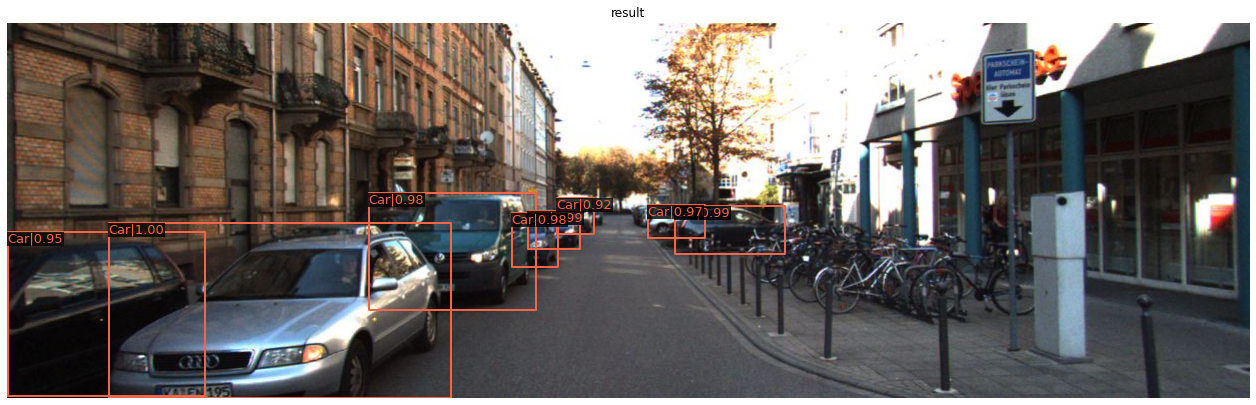

In [31]:
img = mmcv.imread('kitti_tiny/training/image_2/000068.jpeg')

model.cfg = cfg
result = inference_detector(model, img)
show_result_pyplot(model, img, result, score_thr=0.7)

## Coco Dataset 생성(Train, Validation)

In [3]:
import pandas as pd
import numpy as np

In [4]:
# 처음에 /content/mmdetection/mmdetection 으로 경로가 이중으로 잡혀져 있어서 %cd .. > !rm -rf mmdetection 으로 이중으로 잡힌 폴더 삭제
# 그 이후 다시 %cd .. 사용해서 /content로 이동함
!pwd
#%cd .. # 중요: 현재 경로위치가 /content 로 설정되어 있어야 함!

/content


In [5]:
total_df = pd.read_csv('drive/MyDrive/Colab Notebooks/Xray/train.csv', encoding = 'utf-8')
total_df.head()

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN


In [65]:
# !mkdir -p mmdetection/data/coco

In [6]:
# 하위 목록까지 recursive하게 copy 수행 // !cp --help
# !cp -r drive/MyDrive/Kaggle/train mmdetection/data/coco/
# !cp -r drive/MyDrive/Kaggle/val mmdetection/data/coco/
# !cp -r drive/MyDrive/Kaggle/test mmdetection/data/coco/

In [8]:
# !rm -rf mmdetection/data

In [7]:
import os

In [16]:
first_root = 'drive/MyDrive/Kaggle'
# Check the image files in directory
train_img_list = os.listdir('drive/MyDrive/Kaggle/train') # 3662
val_img_list = os.listdir('drive/MyDrive/Kaggle/val') # 732
test_img_list = os.listdir('drive/MyDrive/Kaggle/test') # 3000

In [11]:
len(train_img_list), len(val_img_list), len(test_img_list)

(3662, 732, 3000)

In [12]:
# No Finding 필터링
total_df = total_df[total_df.class_id != 14] # 4394

In [13]:
total_df

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
5,1c32170b4af4ce1a3030eb8167753b06,Pleural thickening,11,R9,627.0,357.0,947.0,433.0
6,0c7a38f293d5f5e4846aa4ca6db4daf1,ILD,5,R17,1347.0,245.0,2188.0,2169.0
7,47ed17dcb2cbeec15182ed335a8b5a9e,Nodule/Mass,8,R9,557.0,2352.0,675.0,2484.0
...,...,...,...,...,...,...,...,...
67903,b53d1dd80e99ca6bcef9d592f65d3321,Pleural effusion,10,R9,240.0,1550.0,562.0,2001.0
67906,26d1d5a0ef2e692c6340e74859ffdc53,Pulmonary fibrosis,13,R10,1163.0,787.0,1338.0,941.0
67907,22672ab82c290c20b86863291e25ef6c,ILD,5,R9,299.0,664.0,794.0,1508.0
67908,db169d0be36123bd55b866d6aa73983b,Other lesion,9,R8,6.0,670.0,272.0,1736.0


In [17]:
total_df['path'] = None
for i in range(len(total_df)):
    if total_df.iloc[i, 0] + '.png' in train_img_list:
        total_df.iloc[i, -1] = first_root + '/train/' + total_df.iloc[i, 0] + '.png'
    elif total_df.iloc[i, 0] + '.png' in val_img_list:
        total_df.iloc[i, -1] = first_root + '/val/' + total_df.iloc[i, 0] + '.png'

In [18]:
total_df.iloc[0, -1]

'drive/MyDrive/Kaggle/train/9a5094b2563a1ef3ff50dc5c7ff71345.png'

In [20]:
total_df = total_df.sort_values(by = 'path').reset_index(drop = True)

In [21]:
total_df.head(3)

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,path
0,0007d316f756b3fa0baea2ff514ce945,Aortic enlargement,0,R9,1235.0,1021.0,1482.0,1281.0,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...
1,0007d316f756b3fa0baea2ff514ce945,Pulmonary fibrosis,13,R9,804.0,716.0,857.0,920.0,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...
2,0007d316f756b3fa0baea2ff514ce945,Pulmonary fibrosis,13,R10,818.0,677.0,987.0,939.0,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...


In [22]:
train_files = []
val_files = []

for dirname, _, filenames in os.walk(first_root + '/train'):
    for filename in filenames:
        train_files.append(filename[:-4])

for dirname, _, filenames in os.walk(first_root + '/val'):
    for filename in filenames:
        val_files.append(filename[:-4])
        
len(train_files), len(val_files)

(3662, 732)

In [24]:
train_files = np.sort(train_files).tolist()
val_files = np.sort(val_files).tolist()

In [25]:
# 시간 소요 있음 (약 20분)
import cv2

train_img_width_list = []
train_img_heigh_list = []

for item in train_files:
    image = cv2.imread(first_root + f'/train/{item}.png', cv2.IMREAD_GRAYSCALE)
    w = image.shape[1]
    h = image.shape[0]
    train_img_width_list.append(w)
    train_img_heigh_list.append(h)
    
val_img_width_list = []
val_img_heigh_list = []
    
for item in val_files:
    image = cv2.imread(first_root + f'/val/{item}.png', cv2.IMREAD_GRAYSCALE)
    w = image.shape[1]
    h = image.shape[0]
    val_img_width_list.append(w)
    val_img_heigh_list.append(h)

In [26]:
print(train_img_width_list[:5], train_img_heigh_list[:5])
print(val_img_width_list[:5], val_img_heigh_list[:5])

[1024, 1024, 1024, 1024, 1024] [1024, 1024, 1024, 1024, 1024]
[1024, 1024, 1024, 1024, 1024] [1024, 1024, 1024, 1024, 1024]


In [29]:
width_list = []
height_list = []

for item in total_df.image_id:
    if item in train_files:
        index = train_files.index(item)
        width_list.append(train_img_width_list[index])
        height_list.append(train_img_heigh_list[index])
    elif item in val_files:
        index = val_files.index(item)
        width_list.append(val_img_width_list[index])
        height_list.append(val_img_heigh_list[index])

In [30]:
np.array(width_list), np.array(width_list).shape

(array([1024, 1024, 1024, ..., 1024, 1024, 1024]), (36096,))

In [31]:
np.min(np.array(width_list)), np.min(np.array(height_list))

(1024, 1024)

In [32]:
total_df.image_id.nunique()

4394

In [42]:
train_result_df = pd.read_csv('drive/MyDrive/Colab Notebooks/Xray/train_result.csv', encoding='utf-8')
train_result_df.drop('Unnamed: 0',axis=1, inplace=True)

In [44]:
print(len(train_result_df))
train_result_df.head()

36096


,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,height,width,location,shape
0,0007d316f756b3fa0baea2ff514ce945,Aortic enlargement,0,R9,1235.0,1021.0,1482.0,1281.0,247.0,260.0,train/0007d316f756b3fa0baea2ff514ce945.png,"[2304, 2880]"
1,0007d316f756b3fa0baea2ff514ce945,Pulmonary fibrosis,13,R9,804.0,716.0,857.0,920.0,53.0,204.0,train/0007d316f756b3fa0baea2ff514ce945.png,"[2304, 2880]"
2,0007d316f756b3fa0baea2ff514ce945,Pulmonary fibrosis,13,R10,818.0,677.0,987.0,939.0,169.0,262.0,train/0007d316f756b3fa0baea2ff514ce945.png,"[2304, 2880]"
3,0007d316f756b3fa0baea2ff514ce945,Pleural thickening,11,R8,621.0,673.0,1025.0,851.0,404.0,178.0,train/0007d316f756b3fa0baea2ff514ce945.png,"[2304, 2880]"
4,0007d316f756b3fa0baea2ff514ce945,Aortic enlargement,0,R10,1275.0,1039.0,1498.0,1241.0,223.0,202.0,train/0007d316f756b3fa0baea2ff514ce945.png,"[2304, 2880]"


In [46]:
print(len(total_df))
total_df.head()

36096


,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,path
0,0007d316f756b3fa0baea2ff514ce945,Aortic enlargement,0,R9,1235.0,1021.0,1482.0,1281.0,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...
1,0007d316f756b3fa0baea2ff514ce945,Pulmonary fibrosis,13,R9,804.0,716.0,857.0,920.0,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...
2,0007d316f756b3fa0baea2ff514ce945,Pulmonary fibrosis,13,R10,818.0,677.0,987.0,939.0,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...
3,0007d316f756b3fa0baea2ff514ce945,Pleural thickening,11,R8,621.0,673.0,1025.0,851.0,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...
4,0007d316f756b3fa0baea2ff514ce945,Aortic enlargement,0,R10,1275.0,1039.0,1498.0,1241.0,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...


In [48]:
(total_df.image_id == train_result_df.image_id).sum()

36096

In [49]:
total_df['before_shape'] = train_result_df['shape']

In [52]:
total_df.before_shape.describe()

count            36096
unique            2013
top       [2304, 2880]
freq              9309
Name: before_shape, dtype: object

In [53]:
total_df['after_shape'] = '[1024, 1024]'

In [54]:
total_df

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,path,before_shape,after_shape
0,0007d316f756b3fa0baea2ff514ce945,Aortic enlargement,0,R9,1235.0,1021.0,1482.0,1281.0,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[2304, 2880]","[1024, 1024]"
1,0007d316f756b3fa0baea2ff514ce945,Pulmonary fibrosis,13,R9,804.0,716.0,857.0,920.0,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[2304, 2880]","[1024, 1024]"
2,0007d316f756b3fa0baea2ff514ce945,Pulmonary fibrosis,13,R10,818.0,677.0,987.0,939.0,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[2304, 2880]","[1024, 1024]"
3,0007d316f756b3fa0baea2ff514ce945,Pleural thickening,11,R8,621.0,673.0,1025.0,851.0,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[2304, 2880]","[1024, 1024]"
4,0007d316f756b3fa0baea2ff514ce945,Aortic enlargement,0,R10,1275.0,1039.0,1498.0,1241.0,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[2304, 2880]","[1024, 1024]"
...,...,...,...,...,...,...,...,...,...,...,...
36091,6ece94f09d405a17472ba1cf4471e548,Cardiomegaly,3,R10,981.0,1459.0,2208.0,1858.0,drive/MyDrive/Kaggle/val/6ece94f09d405a17472ba...,"[2788, 2656]","[1024, 1024]"
36092,6ece94f09d405a17472ba1cf4471e548,Aortic enlargement,0,R10,1295.0,791.0,1670.0,1162.0,drive/MyDrive/Kaggle/val/6ece94f09d405a17472ba...,"[2788, 2656]","[1024, 1024]"
36093,6ece94f09d405a17472ba1cf4471e548,Aortic enlargement,0,R9,1331.0,779.0,1669.0,1102.0,drive/MyDrive/Kaggle/val/6ece94f09d405a17472ba...,"[2788, 2656]","[1024, 1024]"
36094,6ece94f09d405a17472ba1cf4471e548,Cardiomegaly,3,R8,978.0,1431.0,2215.0,1776.0,drive/MyDrive/Kaggle/val/6ece94f09d405a17472ba...,"[2788, 2656]","[1024, 1024]"


In [ ]:
1235.0 : 2304 = x : 1024
x = 1235.0 * 1024 / 2304

In [60]:
total_df['x_min2'] = None
total_df['y_min2'] = None
total_df['x_max2'] = None
total_df['y_max2'] = None

In [62]:
total_df.head(2)

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,path,before_shape,after_shape,x_min2,y_min2,x_max2,y_max2
0,0007d316f756b3fa0baea2ff514ce945,Aortic enlargement,0,R9,1235.0,1021.0,1482.0,1281.0,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[2304, 2880]","[1024, 1024]",None,None,None,None
1,0007d316f756b3fa0baea2ff514ce945,Pulmonary fibrosis,13,R9,804.0,716.0,857.0,920.0,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[2304, 2880]","[1024, 1024]",None,None,None,None


In [90]:
for i in range(len(total_df)):
  x_min2, y_min2, x_max2, y_max2 = total_df.iloc[i, 4:8] * 1024 / int(total_df.iloc[i, 9][1:5])
  total_df.iloc[i, 11:15] = x_min2, y_min2, x_max2, y_max2

In [91]:
total_df.head(3)

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,path,before_shape,after_shape,x_min2,y_min2,x_max2,y_max2
0,0007d316f756b3fa0baea2ff514ce945,Aortic enlargement,0,R9,1235.0,1021.0,1482.0,1281.0,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[2304, 2880]","[1024, 1024]",548.889,453.778,658.667,569.333
1,0007d316f756b3fa0baea2ff514ce945,Pulmonary fibrosis,13,R9,804.0,716.0,857.0,920.0,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[2304, 2880]","[1024, 1024]",357.333,318.222,380.889,408.889
2,0007d316f756b3fa0baea2ff514ce945,Pulmonary fibrosis,13,R10,818.0,677.0,987.0,939.0,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[2304, 2880]","[1024, 1024]",363.556,300.889,438.667,417.333


In [93]:
total_df['box_width'] = total_df['x_max2'] - total_df['x_min2']
total_df['box_height'] = total_df['y_max2'] - total_df['y_min2']
total_df['img_width'] = width_list
total_df['img_height'] = height_list
total_df

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,path,before_shape,after_shape,x_min2,y_min2,x_max2,y_max2,box_width,box_height,img_width,img_height
0,0007d316f756b3fa0baea2ff514ce945,Aortic enlargement,0,R9,1235.0,1021.0,1482.0,1281.0,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[2304, 2880]","[1024, 1024]",548.889,453.778,658.667,569.333,109.778,115.556,1024,1024
1,0007d316f756b3fa0baea2ff514ce945,Pulmonary fibrosis,13,R9,804.0,716.0,857.0,920.0,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[2304, 2880]","[1024, 1024]",357.333,318.222,380.889,408.889,23.5556,90.6667,1024,1024
2,0007d316f756b3fa0baea2ff514ce945,Pulmonary fibrosis,13,R10,818.0,677.0,987.0,939.0,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[2304, 2880]","[1024, 1024]",363.556,300.889,438.667,417.333,75.1111,116.444,1024,1024
3,0007d316f756b3fa0baea2ff514ce945,Pleural thickening,11,R8,621.0,673.0,1025.0,851.0,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[2304, 2880]","[1024, 1024]",276,299.111,455.556,378.222,179.556,79.1111,1024,1024
4,0007d316f756b3fa0baea2ff514ce945,Aortic enlargement,0,R10,1275.0,1039.0,1498.0,1241.0,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[2304, 2880]","[1024, 1024]",566.667,461.778,665.778,551.556,99.1111,89.7778,1024,1024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36091,6ece94f09d405a17472ba1cf4471e548,Cardiomegaly,3,R10,981.0,1459.0,2208.0,1858.0,drive/MyDrive/Kaggle/val/6ece94f09d405a17472ba...,"[2788, 2656]","[1024, 1024]",360.31,535.874,810.973,682.422,450.663,146.548,1024,1024
36092,6ece94f09d405a17472ba1cf4471e548,Aortic enlargement,0,R10,1295.0,791.0,1670.0,1162.0,drive/MyDrive/Kaggle/val/6ece94f09d405a17472ba...,"[2788, 2656]","[1024, 1024]",475.638,290.525,613.372,426.789,137.733,136.264,1024,1024
36093,6ece94f09d405a17472ba1cf4471e548,Aortic enlargement,0,R9,1331.0,779.0,1669.0,1102.0,drive/MyDrive/Kaggle/val/6ece94f09d405a17472ba...,"[2788, 2656]","[1024, 1024]",488.861,286.118,613.004,404.752,124.143,118.634,1024,1024
36094,6ece94f09d405a17472ba1cf4471e548,Cardiomegaly,3,R8,978.0,1431.0,2215.0,1776.0,drive/MyDrive/Kaggle/val/6ece94f09d405a17472ba...,"[2788, 2656]","[1024, 1024]",359.208,525.59,813.544,652.304,454.336,126.714,1024,1024


In [98]:
total_df.index.name = 'id'
total_df['iscrowd'] = 0
total_df['area'] = total_df['box_width'] * total_df['box_height']
total_df.head(3)

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,path,before_shape,after_shape,x_min2,y_min2,x_max2,y_max2,box_width,box_height,img_width,img_height,iscrowd,area
id,,,,,,,,,,,,,,,,,,,,,
0,0007d316f756b3fa0baea2ff514ce945,Aortic enlargement,0,R9,1235.0,1021.0,1482.0,1281.0,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[2304, 2880]","[1024, 1024]",548.889,453.778,658.667,569.333,109.778,115.556,1024,1024,0,12685.4
1,0007d316f756b3fa0baea2ff514ce945,Pulmonary fibrosis,13,R9,804.0,716.0,857.0,920.0,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[2304, 2880]","[1024, 1024]",357.333,318.222,380.889,408.889,23.5556,90.6667,1024,1024,0,2135.7
2,0007d316f756b3fa0baea2ff514ce945,Pulmonary fibrosis,13,R10,818.0,677.0,987.0,939.0,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[2304, 2880]","[1024, 1024]",363.556,300.889,438.667,417.333,75.1111,116.444,1024,1024,0,8746.27


In [100]:
boundary = total_df['path'].str.startswith('drive/MyDrive/Kaggle/train').sum()
boundary

30067

In [104]:
train_length = total_df[:boundary].path.nunique()
val_length = total_df[boundary:].path.nunique()

In [105]:
train_length, val_length

(3662, 732)

In [116]:
total_df['image_id'].unique()

array(['0007d316f756b3fa0baea2ff514ce945',
       '00150343289f317a0ad5629d5b7d9ef9',
       '0046f681f078851293c4e710c4466058', ...,
       '6e5776831430f043f18d70c93239457a',
       '6ebee97d53199fb6126b8eeb2acc7f44',
       '6ece94f09d405a17472ba1cf4471e548'], dtype=object)

In [118]:
total_df['image_number'] = -1
total_dict = {index : image_number for index, image_number in enumerate(total_df.image_id.unique())}
total_dict2 = dict(map(reversed, total_dict.items()))

In [120]:
for i in range(len(total_df)):
    if total_df.iloc[i, 0] in total_dict2.keys():
        total_df.iloc[i, -1] = total_dict2[total_df.iloc[i, 0]]

In [121]:
total_df

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,path,before_shape,after_shape,x_min2,y_min2,x_max2,y_max2,box_width,box_height,img_width,img_height,iscrowd,area,image_number
id,,,,,,,,,,,,,,,,,,,,,,
0,0007d316f756b3fa0baea2ff514ce945,Aortic enlargement,0,R9,1235.0,1021.0,1482.0,1281.0,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[2304, 2880]","[1024, 1024]",548.889,453.778,658.667,569.333,109.778,115.556,1024,1024,0,12685.4,0
1,0007d316f756b3fa0baea2ff514ce945,Pulmonary fibrosis,13,R9,804.0,716.0,857.0,920.0,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[2304, 2880]","[1024, 1024]",357.333,318.222,380.889,408.889,23.5556,90.6667,1024,1024,0,2135.7,0
2,0007d316f756b3fa0baea2ff514ce945,Pulmonary fibrosis,13,R10,818.0,677.0,987.0,939.0,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[2304, 2880]","[1024, 1024]",363.556,300.889,438.667,417.333,75.1111,116.444,1024,1024,0,8746.27,0
3,0007d316f756b3fa0baea2ff514ce945,Pleural thickening,11,R8,621.0,673.0,1025.0,851.0,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[2304, 2880]","[1024, 1024]",276,299.111,455.556,378.222,179.556,79.1111,1024,1024,0,14204.8,0
4,0007d316f756b3fa0baea2ff514ce945,Aortic enlargement,0,R10,1275.0,1039.0,1498.0,1241.0,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[2304, 2880]","[1024, 1024]",566.667,461.778,665.778,551.556,99.1111,89.7778,1024,1024,0,8897.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36091,6ece94f09d405a17472ba1cf4471e548,Cardiomegaly,3,R10,981.0,1459.0,2208.0,1858.0,drive/MyDrive/Kaggle/val/6ece94f09d405a17472ba...,"[2788, 2656]","[1024, 1024]",360.31,535.874,810.973,682.422,450.663,146.548,1024,1024,0,66043.8,4393
36092,6ece94f09d405a17472ba1cf4471e548,Aortic enlargement,0,R10,1295.0,791.0,1670.0,1162.0,drive/MyDrive/Kaggle/val/6ece94f09d405a17472ba...,"[2788, 2656]","[1024, 1024]",475.638,290.525,613.372,426.789,137.733,136.264,1024,1024,0,18768.1,4393
36093,6ece94f09d405a17472ba1cf4471e548,Aortic enlargement,0,R9,1331.0,779.0,1669.0,1102.0,drive/MyDrive/Kaggle/val/6ece94f09d405a17472ba...,"[2788, 2656]","[1024, 1024]",488.861,286.118,613.004,404.752,124.143,118.634,1024,1024,0,14727.7,4393


In [122]:
test_list1 = [1, 2, 3, 4]
test_list2 = [5, 6, 7, 8]
test_str = "for test"
test_dict = dict(a = test_list1, b = test_list2)
print(test_dict)
blank_list = []
blank_list.append(test_dict)

temp = dict(filename = test_list1, width = test_list2, str_test = test_str, 
            test_dict = test_dict, test_dict_in_list = blank_list)
temp

{'a': [1, 2, 3, 4], 'b': [5, 6, 7, 8]}


{'filename': [1, 2, 3, 4],
 'str_test': 'for test',
 'test_dict': {'a': [1, 2, 3, 4], 'b': [5, 6, 7, 8]},
 'test_dict_in_list': [{'a': [1, 2, 3, 4], 'b': [5, 6, 7, 8]}],
 'width': [5, 6, 7, 8]}

In [253]:
categories_dict = {index : lesion for index, lesion in enumerate(np.sort(total_df.class_name.unique()))}
print(categories_dict)
len(categories_dict)

{0: 'Aortic enlargement', 1: 'Atelectasis', 2: 'Calcification', 3: 'Cardiomegaly', 4: 'Consolidation', 5: 'ILD', 6: 'Infiltration', 7: 'Lung Opacity', 8: 'Nodule/Mass', 9: 'Other lesion', 10: 'Pleural effusion', 11: 'Pleural thickening', 12: 'Pneumothorax', 13: 'Pulmonary fibrosis'}


14

In [131]:
total_df.drop(columns=['x_min', 'y_min', 'x_max', 'y_max', 'before_shape'], inplace=True)
total_df

,image_id,class_name,class_id,rad_id,path,after_shape,x_min2,y_min2,x_max2,y_max2,box_width,box_height,img_width,img_height,iscrowd,area,image_number
id,,,,,,,,,,,,,,,,,
0,0007d316f756b3fa0baea2ff514ce945,Aortic enlargement,0,R9,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[1024, 1024]",548.889,453.778,658.667,569.333,109.778,115.556,1024,1024,0,12685.4,0
1,0007d316f756b3fa0baea2ff514ce945,Pulmonary fibrosis,13,R9,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[1024, 1024]",357.333,318.222,380.889,408.889,23.5556,90.6667,1024,1024,0,2135.7,0
2,0007d316f756b3fa0baea2ff514ce945,Pulmonary fibrosis,13,R10,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[1024, 1024]",363.556,300.889,438.667,417.333,75.1111,116.444,1024,1024,0,8746.27,0
3,0007d316f756b3fa0baea2ff514ce945,Pleural thickening,11,R8,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[1024, 1024]",276,299.111,455.556,378.222,179.556,79.1111,1024,1024,0,14204.8,0
4,0007d316f756b3fa0baea2ff514ce945,Aortic enlargement,0,R10,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[1024, 1024]",566.667,461.778,665.778,551.556,99.1111,89.7778,1024,1024,0,8897.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36091,6ece94f09d405a17472ba1cf4471e548,Cardiomegaly,3,R10,drive/MyDrive/Kaggle/val/6ece94f09d405a17472ba...,"[1024, 1024]",360.31,535.874,810.973,682.422,450.663,146.548,1024,1024,0,66043.8,4393
36092,6ece94f09d405a17472ba1cf4471e548,Aortic enlargement,0,R10,drive/MyDrive/Kaggle/val/6ece94f09d405a17472ba...,"[1024, 1024]",475.638,290.525,613.372,426.789,137.733,136.264,1024,1024,0,18768.1,4393
36093,6ece94f09d405a17472ba1cf4471e548,Aortic enlargement,0,R9,drive/MyDrive/Kaggle/val/6ece94f09d405a17472ba...,"[1024, 1024]",488.861,286.118,613.004,404.752,124.143,118.634,1024,1024,0,14727.7,4393


In [132]:
train_df = total_df[:boundary]
val_df = total_df[boundary:]

In [133]:
display(train_df, val_df)

,image_id,class_name,class_id,rad_id,path,after_shape,x_min2,y_min2,x_max2,y_max2,box_width,box_height,img_width,img_height,iscrowd,area,image_number
id,,,,,,,,,,,,,,,,,
0,0007d316f756b3fa0baea2ff514ce945,Aortic enlargement,0,R9,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[1024, 1024]",548.889,453.778,658.667,569.333,109.778,115.556,1024,1024,0,12685.4,0
1,0007d316f756b3fa0baea2ff514ce945,Pulmonary fibrosis,13,R9,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[1024, 1024]",357.333,318.222,380.889,408.889,23.5556,90.6667,1024,1024,0,2135.7,0
2,0007d316f756b3fa0baea2ff514ce945,Pulmonary fibrosis,13,R10,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[1024, 1024]",363.556,300.889,438.667,417.333,75.1111,116.444,1024,1024,0,8746.27,0
3,0007d316f756b3fa0baea2ff514ce945,Pleural thickening,11,R8,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[1024, 1024]",276,299.111,455.556,378.222,179.556,79.1111,1024,1024,0,14204.8,0
4,0007d316f756b3fa0baea2ff514ce945,Aortic enlargement,0,R10,drive/MyDrive/Kaggle/train/0007d316f756b3fa0ba...,"[1024, 1024]",566.667,461.778,665.778,551.556,99.1111,89.7778,1024,1024,0,8897.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30062,ffe6f9fe648a7ec29a50feb92d6c15a4,Cardiomegaly,3,R9,drive/MyDrive/Kaggle/train/ffe6f9fe648a7ec29a5...,"[1024, 1024]",436.296,705.931,876.025,909.205,439.729,203.274,1024,1024,0,89385.7,3660
30063,ffe6f9fe648a7ec29a50feb92d6c15a4,Cardiomegaly,3,R8,drive/MyDrive/Kaggle/train/ffe6f9fe648a7ec29a5...,"[1024, 1024]",440.873,682.285,882.89,900.052,442.017,217.767,1024,1024,0,96256.7,3660
30064,ffeffc54594debf3716d6fcd2402a99f,Aortic enlargement,0,R8,drive/MyDrive/Kaggle/train/ffeffc54594debf3716...,"[1024, 1024]",508.675,304.623,648.312,488.727,139.636,184.104,1024,1024,0,25707.6,3661


,image_id,class_name,class_id,rad_id,path,after_shape,x_min2,y_min2,x_max2,y_max2,box_width,box_height,img_width,img_height,iscrowd,area,image_number
id,,,,,,,,,,,,,,,,,
30067,0005e8e3701dfb1dd93d53e2ff537b6e,Infiltration,6,R10,drive/MyDrive/Kaggle/val/0005e8e3701dfb1dd93d5...,"[1024, 1024]",300,195.667,401.667,296,101.667,100.333,1024,1024,0,10200.6,3662
30068,0005e8e3701dfb1dd93d53e2ff537b6e,Nodule/Mass,8,R8,drive/MyDrive/Kaggle/val/0005e8e3701dfb1dd93d5...,"[1024, 1024]",310.667,189,399,298.667,88.3333,109.667,1024,1024,0,9687.22,3662
30069,0005e8e3701dfb1dd93d53e2ff537b6e,Lung Opacity,7,R9,drive/MyDrive/Kaggle/val/0005e8e3701dfb1dd93d5...,"[1024, 1024]",301.667,194.333,401,296.667,99.3333,102.333,1024,1024,0,10165.1,3662
30070,0005e8e3701dfb1dd93d53e2ff537b6e,Consolidation,4,R8,drive/MyDrive/Kaggle/val/0005e8e3701dfb1dd93d5...,"[1024, 1024]",310.667,189,399,298.667,88.3333,109.667,1024,1024,0,9687.22,3662
30071,0005e8e3701dfb1dd93d53e2ff537b6e,Lung Opacity,7,R10,drive/MyDrive/Kaggle/val/0005e8e3701dfb1dd93d5...,"[1024, 1024]",300,195.667,401.667,296,101.667,100.333,1024,1024,0,10200.6,3662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36091,6ece94f09d405a17472ba1cf4471e548,Cardiomegaly,3,R10,drive/MyDrive/Kaggle/val/6ece94f09d405a17472ba...,"[1024, 1024]",360.31,535.874,810.973,682.422,450.663,146.548,1024,1024,0,66043.8,4393
36092,6ece94f09d405a17472ba1cf4471e548,Aortic enlargement,0,R10,drive/MyDrive/Kaggle/val/6ece94f09d405a17472ba...,"[1024, 1024]",475.638,290.525,613.372,426.789,137.733,136.264,1024,1024,0,18768.1,4393
36093,6ece94f09d405a17472ba1cf4471e548,Aortic enlargement,0,R9,drive/MyDrive/Kaggle/val/6ece94f09d405a17472ba...,"[1024, 1024]",488.861,286.118,613.004,404.752,124.143,118.634,1024,1024,0,14727.7,4393


In [134]:
import json
from collections import OrderedDict

In [240]:
images_list = []
for item in zip(train_df.image_number.unique(), train_df.image_id.unique()):
    images_dict = dict(id = int(item[0]), file_name = item[1] + '.png', width = 1024, height = 1024)
    images_list.append(images_dict)
    
images_list2 = []
for item in zip(val_df.image_number.unique(), val_df.image_id.unique()):
    images_dict2 = dict(id = int(item[0]), file_name = item[1] + '.png', width = 1024, height = 1024)
    images_list2.append(images_dict2)

In [241]:
annotations_list = []
for item in zip(train_df.index.tolist(), train_df.image_number, train_df.class_id, train_df.x_min2, train_df.y_min2,
               train_df.box_width, train_df.box_height, train_df.iscrowd, train_df.area):
    annotations_dict = dict(id = int(item[0]), image_id = int(item[1]), category_id = int(item[2]), segmentation = [item[3], item[4], item[3]+item[5], item[4], item[3]+item[5], item[4]+item[6], item[3], item[4]+item[6], item[3], item[4]],
                            bbox = [item[3], item[4], item[5], item[6]], iscrowd = int(item[7]), area = item[8])
    annotations_list.append(annotations_dict)
    
annotations_list2 = []
for item in zip(val_df.index.tolist(), val_df.image_number, val_df.class_id, val_df.x_min2, val_df.y_min2,
               val_df.box_width, val_df.box_height, val_df.iscrowd, val_df.area):
    annotations_dict2 = dict(id = int(item[0]), image_id = int(item[1]), category_id = int(item[2]), segmentation = [item[3], item[4], item[3]+item[5], item[4], item[3]+item[5], item[4]+item[6], item[3], item[4]+item[6], item[3], item[4]],
                             bbox = [item[3], item[4], item[5], item[6]], iscrowd = int(item[7]), area = item[8])
    annotations_list2.append(annotations_dict2)

In [242]:
categories_list = []
for key, value in categories_dict.items():
    temp = dict(id = key, name = value, supercategory = None)
    categories_list.append(temp)

In [243]:
def make_coco(images_list, annotations_list, categories_list):
    x_ray_coco = OrderedDict()

    x_ray_coco["images"] = images_list
    x_ray_coco["annotations"] = annotations_list
    x_ray_coco["categories"] = categories_list

    if json.dumps(x_ray_coco, ensure_ascii = False, indent = "\t"):
        return x_ray_coco

In [244]:
train_dict = make_coco(images_list, annotations_list, categories_list)
val_dict = make_coco(images_list2, annotations_list2, categories_list)

In [215]:
!pwd
!mkdir -p drive/MyDrive/Kaggle/annotations

/content


In [239]:
with open('drive/MyDrive/Kaggle/annotations/train.json', 'w', encoding="utf-8") as f1:
    json.dump(train_dict, f1, ensure_ascii=False, indent="\t")

In [217]:
with open('drive/MyDrive/Kaggle/annotations/val.json', 'w', encoding="utf-8") as f1:
    json.dump(val_dict, f1, ensure_ascii=False, indent="\t")

In [221]:
!cp drive/MyDrive/Kaggle/default_runtime_DetectoRS_ResNet.py mmdetection/configs/_base_

In [222]:
!cp mmdetection/mmdet/datasets/coco.py mmdetection/mmdet/datasets/coco_backup.py
!cp drive/MyDrive/Kaggle/coco.py mmdetection/mmdet/datasets/coco.py

## VinBigData 훈련 및 검증

In [231]:
!python mmdetection/tools/train.py mmdetection/configs/_base_/default_runtime_DetectoRS_ResNet.py

python3: can't open file 'mmdetection/tools/train.py': [Errno 2] No such file or directory


In [232]:
!pwd

/content/mmdetection


In [233]:
%cd ..

/content


In [234]:
# !python mmdetection/tools/train.py mmdetection/configs/_base_/default_runtime_DetectoRS_ResNet.py

fatal: not a git repository (or any of the parent directories): .git
2021-03-07 18:01:15,065 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.10 (default, Feb 20 2021, 21:17:23) [GCC 7.5.0]
CUDA available: True
GPU 0: Tesla T4
CUDA_HOME: /usr/local/cuda
NVCC: Build cuda_11.0_bu.TC445_37.28845127_0
GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
PyTorch: 1.5.1+cu101
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2019.0.5 Product Build 20190808 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v0.21.1 (Git Hash 7d2fd500bc78936d1d648ca713b901012f470dbc)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 10.1
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,co

In [236]:
# !mkdir -p mmdetection/data/coco/annotations

In [237]:
# !cp drive/MyDrive/Kaggle/annotations/* mmdetection/data/coco/annotations/

In [1]:
# default_runtime_DetectoRS_ResNet.py 에 경로가 잘못 기재되어 수정 조치
!python mmdetection/tools/train.py mmdetection/configs/detectors/detectors_cascade_rcnn_r50_1x_coco.py
# https://jybaek.tistory.com/785
# https://github.com/pytorch/pytorch/issues/8976
# https://m.blog.naver.com/dsz08082/222019211109

python3: can't open file 'mmdetection/tools/train.py': [Errno 2] No such file or directory


# LOG

In [ ]:
VERSION 1
  - samples_per_gpu & workers_per_gpu >> 16, 16
  - img_scale = (384, 384)
[50*n/229] : 총 4번 수행 / 한 batch_size 당 평균 4분 소요
1 Epoch : 2.5118, 0.9483, 0.9134, 0.8861
2 Epoch : 0.9438, 0.9155, 0.9271, 0.9373
3 Epoch : 0.9812, 0.9422, 0.9478, 0.9599
4 Epoch : 0.9616, 0.9645, 
>> Loss가 줄지를 않음

In [ ]:
VERSION 2
  - samples_per_gpu & workers_per_gpu >> 16, 16
  - img_scale = (1024, 1024)
>> CUDA out of memory

In [ ]:
VERSION 3
  - samples_per_gpu & workers_per_gpu >> 16, 16
  - img_scale = (512, 512)
>> CUDA out of memory

In [ ]:
VERSION 4
  - samples_per_gpu & workers_per_gpu >> 8, 8
  - img_scale = (512, 512)
[50*n/458] : / 한 batch_size 당 평균 3분 소요
1 Epoch : 2.4856, 0.8874, 0.8313, 0.8804, 0.8435, 0.8497, 0.8863, 0.8905, 0.8767
2 Epoch : 0.9469, 0.9450, 0.9172, 0.9742, 0.9707, 1.0139
>> Loss가 줄지 않음

In [ ]:
VERSION 5
  - samples_per_gpu & workers_per_gpu >> 8, 8
  - img_scale = (1024, 1024)
>> CUDA out of memory

In [ ]:
VERSION 6
  - samples_per_gpu & workers_per_gpu >> 4, 4
  - img_scale = (1024, 1024)
>> CUDA out of memory

In [ ]:
VERSION 7
  - samples_per_gpu & workers_per_gpu >> 2, 2
  - img_scale = (1024, 1024)
[50*n/1831] : / 한 batch_size 당 평균 2.3분 소요
1 Epoch : 2.3804, 0.8244, 0.7623, 0.7329, 0.8053, 0.6670, 0.7906, 0.7826, 0.8409, 0.7399, 0.8778, 0.8660, 0.9193, 0.9471, 0.8931, 0.8804, 0.8852, 0.8622, 0.8303, 0.9368, 0.9970, 0.9006, 1.0189, 0.9502, 0.9768,
2 Epoch : 
>> 비정상 종료되어 재실행해야함 (초반 Loss 줄어드는 속도가 가장 빨라서 장기적으로 값을 보고 많은 에폭이 지나도 값이 줄지 않을 경우 다른 대안 생각해야 함)